In [119]:
import pandas as pd
import numpy as np
import yahooquery as yq
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
# create a dataframe of quarterly revenue data of some companies using yahooquery module
revenue = pd.DataFrame()
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'META', 'TSLA']
for ticker in tickers:
    t = yq.Ticker(ticker)
    df = pd.DataFrame(t.get_financial_data(frequency='q', trailing=False, types=['NetIncome']))[['asOfDate', 'NetIncome']]
    df.set_index('asOfDate', inplace=True)
    df['NetIncome'] = df['NetIncome'] / 10e8
    df.rename(columns={'NetIncome': ticker}, inplace=True)
    if revenue.empty: revenue = df
    else: revenue = revenue.join(df, on='asOfDate', how='outer')
revenue.index.name = 'Date'
revenue.head()

,AAPL,MSFT,AMZN,GOOG,META,TSLA
Date,,,,,,
2022-03-31,25.010,16.728,-3.844,16.436,7.465,3.318
2022-06-30,19.442,16.740,-2.028,16.002,6.687,2.259
2022-09-30,20.721,17.556,2.872,13.910,4.395,3.292
2022-12-31,29.998,16.425,0.278,13.624,4.652,3.687
2023-03-31,24.160,18.299,3.172,15.051,5.709,2.513


In [110]:
layoffs = {
    'AAPL': 0,
    'MSFT': 10000,
    'AMZN': 27000,
    'GOOG': 12000,
    'META': 21000,
    'TSLA': 10000
}

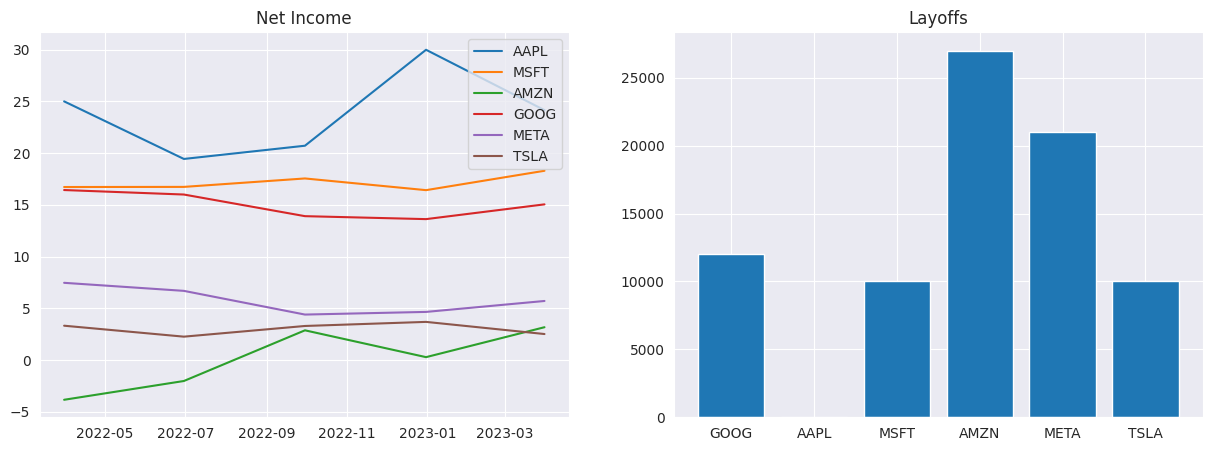

In [97]:
# plot the quarterly revenue data
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(revenue)
plt.legend(revenue.columns)
plt.title('Net Income')

# plot the layoffs data
plt.subplot(1, 2, 2)
plt.bar(range(len(layoffs)), list(layoffs.values()), align='center')
plt.xticks(range(len(layoffs)), list(layoffs.keys()))
plt.title('Layoffs')
plt.show()

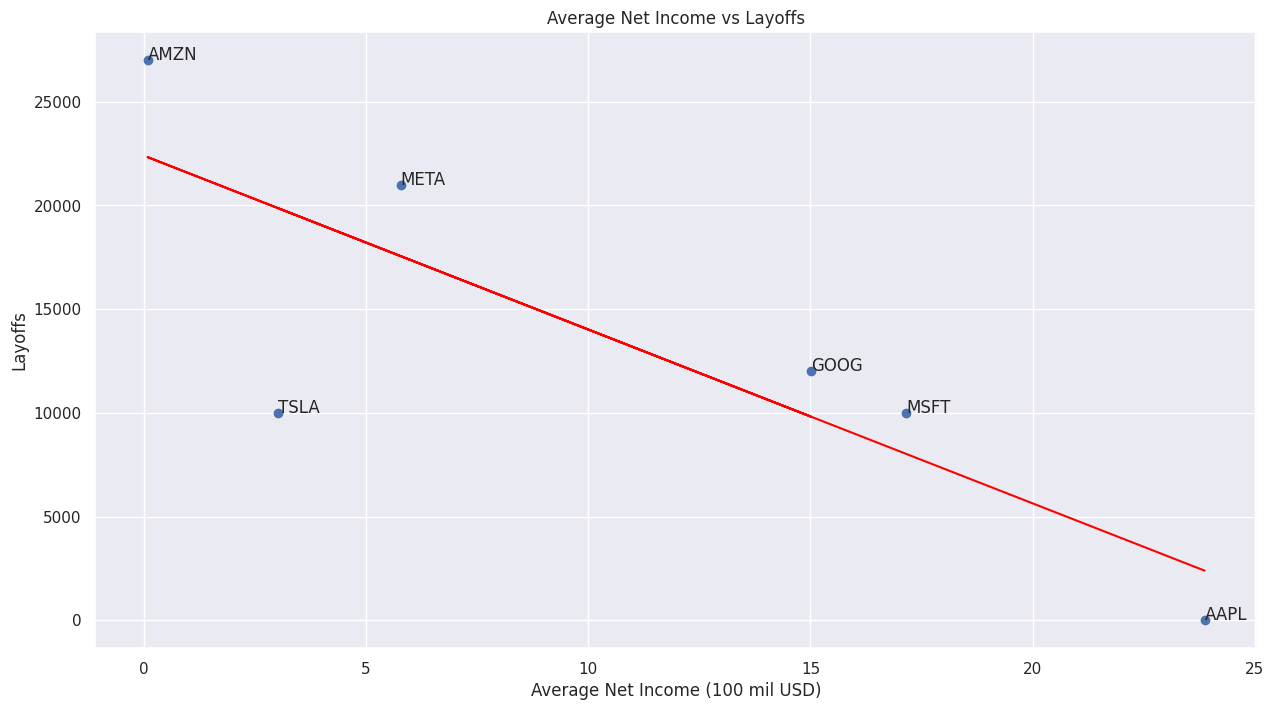

In [117]:
# make a scatter plot of average net income by company vs layoffs
avg_net_income = revenue.mean()
plt.scatter(avg_net_income, layoffs.values())
plt.title('Average Net Income vs Layoffs')
plt.xlabel('Average Net Income (100 mil USD)')
plt.ylabel('Layoffs')

# add labels to each point
for i, txt in enumerate(layoffs.keys()):
    plt.annotate(txt, (avg_net_income[i], layoffs[txt]))

# add regression line
x = avg_net_income
y = list(layoffs.values())
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')


plt.show()